In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Đọc dữ liệu
df = pd.read_excel("kf_coffee (1).xlsx", sheet_name="Trang tính1")

# Hàm tính tổng stock_decreased trong khoảng ngày
def sum_stock_decreased_in_range(stock_history_str, start_date, end_date):
    try:
        history = json.loads(stock_history_str).get("stock_history", [])
        return sum(float(entry.get("stock_decreased", 0))
                   for entry in history if start_date <= entry["date"] <= end_date)
    except:
        return 0

# Tính doanh số theo từng kỳ
df["Tuần 1"] = df["stock_history"].apply(lambda x: sum_stock_decreased_in_range(x, "2025-03-07", "2025-03-14"))
df["Tuần 2"] = df["stock_history"].apply(lambda x: sum_stock_decreased_in_range(x, "2025-03-14", "2025-03-21"))
df["Cả tháng"] = df["stock_history"].apply(lambda x: sum_stock_decreased_in_range(x, "2025-03-07", "2025-03-28"))

# Mapping kỳ -> khoảng ngày
period_labels = {
    "Tuần 1": "Tuần 1 (07/03 → 14/03)",
    "Tuần 2": "Tuần 2 (14/03 → 21/03)",
    "Cả tháng": "Cả tháng (07/03 → 28/03)"
}

# Dropdown chọn kỳ
dropdown = widgets.Dropdown(
    options=["Tuần 1", "Tuần 2", "Cả tháng"],
    value="Tuần 1",
    description="Chọn kỳ:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="350px")
)

# Hàm vẽ biểu đồ
def plot_chart(selected_period):
    plt.figure(figsize=(18, 20))

    # Lấy dữ liệu và sắp xếp
    data_plot = df[["name", selected_period]].copy()
    data_plot = data_plot.sort_values(by=selected_period, ascending=False)

    # Biểu đồ cột ngang
    ax = sns.barplot(x=selected_period, y="name", data=data_plot)

    # Thêm số vào cuối cột
    for i, v in enumerate(data_plot[selected_period]):
        ax.text(v + max(data_plot[selected_period]) * 0.01, i, str(int(v)), color='black', va='center')

    # Tiêu đề có ngày
    title = f"Doanh số bán sản phẩm - {period_labels[selected_period]}"
    plt.title(title, fontsize=16)
    plt.xlabel("Số lượng bán")
    plt.ylabel("Tên sản phẩm")
    plt.tight_layout()

    total = int(data_plot[selected_period].sum())
    print(f"Tổng số lượng bán ({period_labels[selected_period]}): {total} sản phẩm")

    plt.show()

# Hiển thị dropdown và biểu đồ
widgets.interact(plot_chart, selected_period=dropdown)


interactive(children=(Dropdown(description='Chọn kỳ:', layout=Layout(width='350px'), options=('Tuần 1', 'Tuần …

<function __main__.plot_chart(selected_period)>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12680\2747522712.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


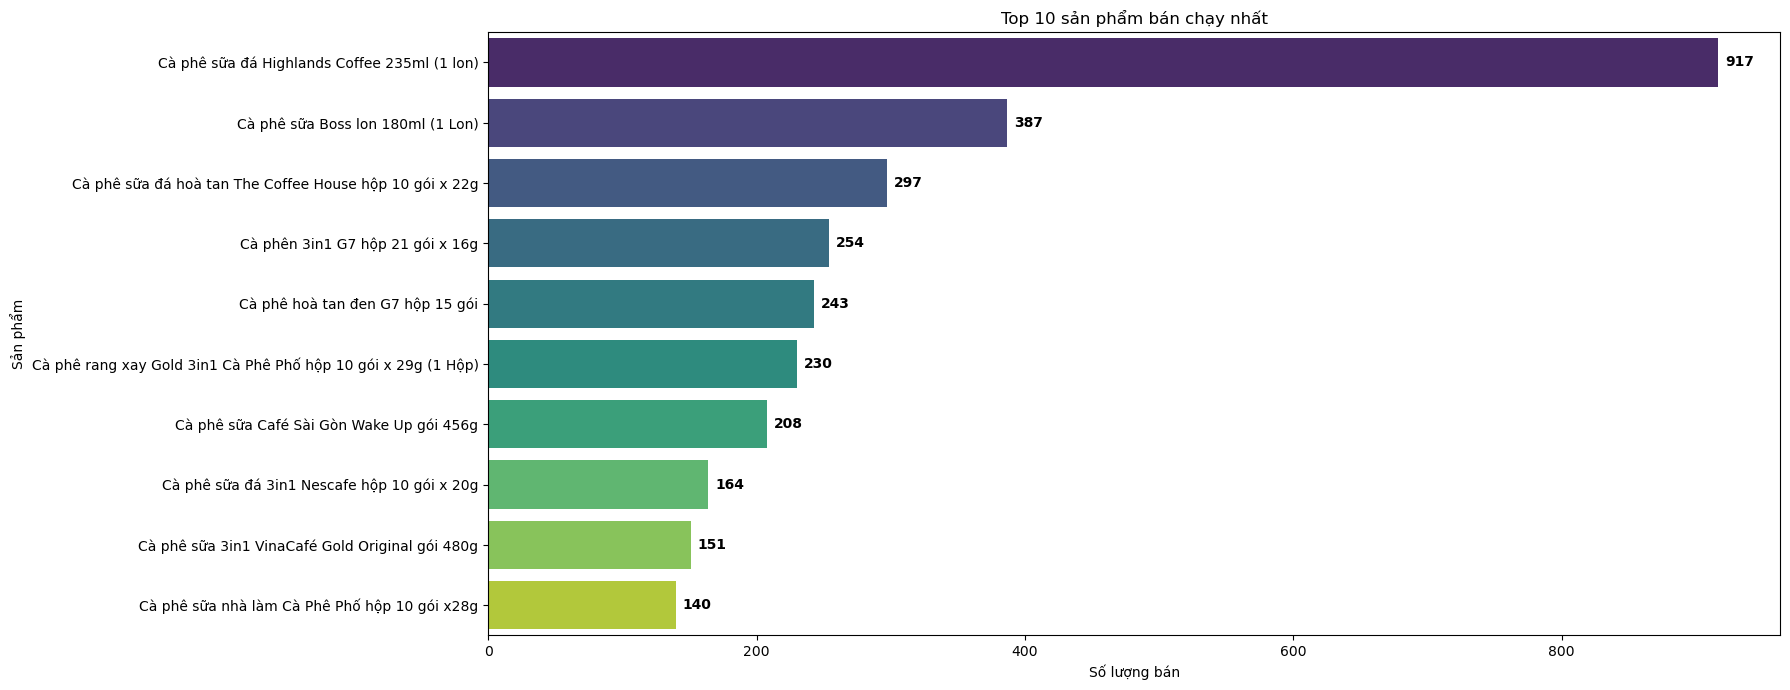

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Đọc dữ liệu
data = pd.read_excel("kf_coffee (1).xlsx")

# Chuẩn hóa tên cột
data.columns = data.columns.str.strip().str.lower()

# Hàm để tính tổng stock_decreased cho từng sản phẩm
def total_stock_decreased(history_str):
    try:
        history = json.loads(history_str).get("stock_history", [])
        return sum(float(entry.get("stock_decreased", 0)) for entry in history)
    except:
        return 0

# Áp dụng hàm
data["stock_decreased"] = data["stock_history"].apply(total_stock_decreased)

# Nhóm và vẽ biểu đồ
top_products = data.groupby('name')['stock_decreased'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(18, 7))
ax = sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
for i, v in enumerate(top_products.values):
    ax.text(v + 5, i, str(int(v)), color='black', va='center', fontweight='bold')
plt.title("Top 10 sản phẩm bán chạy nhất")
plt.xlabel("Số lượng bán")
plt.ylabel("Sản phẩm")
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12680\4157795713.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=revenue_by_product.values, y=revenue_by_product.index, palette='pastel')


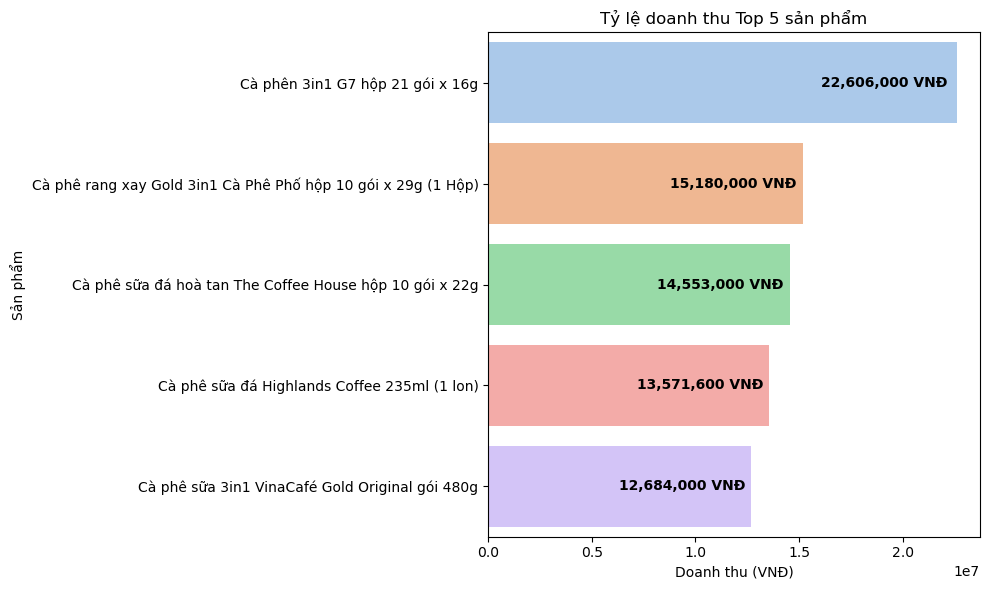

In [ ]:
    import pandas as pd
    import json
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Đọc dữ liệu từ file
    df = pd.read_excel("kf_coffee (1).xlsx", sheet_name="Trang tính1")

    # Hàm tính tổng số lượng bán từ stock_history
    def total_sold_from_history(stock_history_str):
        try:
            history = json.loads(stock_history_str).get("stock_history", [])
            return sum(float(entry.get("stock_decreased", 0)) for entry in history)
        except:
            return 0

    # Áp dụng hàm để tính số lượng bán
    df['so_luong_ban'] = df['stock_history'].apply(total_sold_from_history)

    # Tính doanh thu
    df['doanh_thu'] = df['so_luong_ban'] * df['price']

    # Tính doanh thu theo sản phẩm
    revenue_by_product = df.groupby('name')['doanh_thu'].sum().sort_values(ascending=False).head(5)

    # Vẽ biểu đồ cột
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=revenue_by_product.values, y=revenue_by_product.index, palette='pastel')

    # Hiển thị giá trị doanh thu trên từng cột, căn lề bên trong biểu đồ
    for i, v in enumerate(revenue_by_product.values):
        ax.text(v * 0.98, i, f"{int(v):,} VNĐ", color='black', va='center', ha='right', fontweight='bold')

    plt.title("Tỷ lệ doanh thu Top 5 sản phẩm")
    plt.xlabel("Doanh thu (VNĐ)")
    plt.ylabel("Sản phẩm")
    plt.tight_layout()
    plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ipywidgets as widgets
from IPython.display import display

# Đọc dữ liệu
df = pd.read_excel("kf_coffee (1).xlsx", sheet_name="Trang tính1")

# Hàm tính tổng số lượng giảm tồn kho trong khoảng ngày
def sum_stock_decreased_in_range(stock_history_str, start_date, end_date):
    try:
        history = json.loads(stock_history_str).get("stock_history", [])
        return sum(float(entry.get("stock_decreased", 0))
                   for entry in history if start_date <= entry["date"] <= end_date)
    except:
        return 0

# Tính số lượng bán theo Tuần 1 và Tuần 2
df["Tuần 1"] = df["stock_history"].apply(lambda x: sum_stock_decreased_in_range(x, "2025-03-07", "2025-03-14"))
df["Tuần 2"] = df["stock_history"].apply(lambda x: sum_stock_decreased_in_range(x, "2025-03-14", "2025-03-21"))

# Ép kiểu và xử lý NaN
df["Tuần 1"] = pd.to_numeric(df["Tuần 1"], errors="coerce").fillna(0)
df["Tuần 2"] = pd.to_numeric(df["Tuần 2"], errors="coerce").fillna(0)

# Tính tổng cho cả tháng
df["Cả tháng"] = df["Tuần 1"] + df["Tuần 2"]

# Tính tổng tất cả sản phẩm bán ra
total_week1 = df["Tuần 1"].sum()
total_week2 = df["Tuần 2"].sum()
total_month = total_week1 + total_week2

# Nhãn kỳ
period_labels = {
    "Tuần 1": "Tuần 1 (07 → 14/03)",
    "Tuần 2": "Tuần 2 (14 → 21/03)",
    "Cả tháng": "Cả tháng (07 → 21/03)"
}

# Hàm vẽ biểu đồ các sản phẩm bán dưới 10
def plot_under_10_chart(period):
    data_filtered = df[df[period] < 20][["name", period]].sort_values(by=period, ascending=False)

    if data_filtered.empty:
        print(f"✅ Không có sản phẩm nào bán dưới 10 đơn vị trong {period_labels[period]}.")
        return

    plt.figure(figsize=(18, 8))
    ax = sns.barplot(data=data_filtered, x=period, y="name", color="salmon")

    # Thêm số lên cột
    for i, v in enumerate(data_filtered[period]):
        ax.text(v + 0.1, i, str(int(v)), color='black', va='center', fontweight='bold')

    plt.title(f"Sản phẩm bán dưới 10 đơn vị - {period_labels[period]}")
    plt.xlabel("Số lượng bán")
    plt.ylabel("Tên sản phẩm")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    total_units = data_filtered[period].sum()
    print(f"Tổng sản phẩm bán ra trong {period_labels[period]} (dưới 10 đơn vị): {int(total_units)} đơn vị.")

# Widget dropdown để chọn kỳ
dropdown = widgets.Dropdown(
    options=["Tuần 1", "Tuần 2", "Cả tháng"],
    value="Tuần 1",
    description="Chọn kỳ:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="300px")
)

# Hiển thị widget
widgets.interact(plot_under_10_chart, period=dropdown)

interactive(children=(Dropdown(description='Chọn kỳ:', layout=Layout(width='300px'), options=('Tuần 1', 'Tuần …

<function __main__.plot_under_10_chart(period)>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime

# Đọc dữ liệu từ file
df = pd.read_excel("kf_coffee (1).xlsx", sheet_name="Trang tính1")

# ✅ Hàm tính tổng số lượng giảm tồn kho trong khoảng ngày
def sum_stock_decreased_in_range(stock_history_str, start_date, end_date):
    try:
        history = json.loads(stock_history_str).get("stock_history", [])
        start_dt = datetime.strptime(start_date, "%Y-%m-%d")
        end_dt = datetime.strptime(end_date, "%Y-%m-%d")

        total = 0
        for entry in history:
            entry_date = datetime.strptime(entry["date"], "%Y-%m-%d")
            if start_dt <= entry_date < end_dt:  # Không bao gồm ngày kết thúc
                total += float(entry.get("stock_decreased", 0))
        return total
    except:
        return 0

# ✅ Tính số lượng bán theo Tuần 1 và Tuần 2
df["Tuần 1"] = df["stock_history"].apply(lambda x: sum_stock_decreased_in_range(x, "2025-03-07", "2025-03-14"))
df["Tuần 2"] = df["stock_history"].apply(lambda x: sum_stock_decreased_in_range(x, "2025-03-14", "2025-03-21"))

# Ép kiểu và xử lý NaN
df["Tuần 1"] = pd.to_numeric(df["Tuần 1"], errors="coerce").fillna(0)
df["Tuần 2"] = pd.to_numeric(df["Tuần 2"], errors="coerce").fillna(0)

# ✅ Tính tổng cho cả tháng
df["Cả tháng"] = df["Tuần 1"] + df["Tuần 2"]

# ✅ Tổng sản phẩm bán ra
total_week1 = df["Tuần 1"].sum()
total_week2 = df["Tuần 2"].sum()
total_month = df["Cả tháng"].sum()

# Gán nhãn hiển thị
period_labels = {
    "Tuần 1": "Tuần 1 (07 → 14/03)",
    "Tuần 2": "Tuần 2 (14 → 21/03)",
    "Cả tháng": "Cả tháng (07 → 21/03)"
}

# ✅ Hàm vẽ biểu đồ các sản phẩm bán dưới 10 đơn vị
def plot_under_10_chart(period):
    data_filtered = df[df[period] < 10][["name", period]].sort_values(by=period, ascending=False)

    if data_filtered.empty:
        print(f"✅ Không có sản phẩm nào bán dưới 10 đơn vị trong {period_labels[period]}.")
        return

    plt.figure(figsize=(18, 8))
    ax = sns.barplot(data=data_filtered, x=period, y="name", color="salmon")

    # Thêm số lên cột
    for i, v in enumerate(data_filtered[period]):
        ax.text(v + 0.1, i, str(int(v)), color='black', va='center', fontweight='bold')

    plt.title(f"Sản phẩm bán dưới 10 đơn vị - {period_labels[period]}")
    plt.xlabel("Số lượng bán")
    plt.ylabel("Tên sản phẩm")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    total_units = data_filtered[period].sum()
    print(f"Tổng sản phẩm bán ra trong {period_labels[period]} (dưới 10 đơn vị): {int(total_units)} đơn vị.")

# Widget chọn kỳ
dropdown = widgets.Dropdown(
    options=["Tuần 1", "Tuần 2", "Cả tháng"],
    value="Tuần 1",
    description="Chọn kỳ:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="300px")
)

# Hiển thị widget tương tác
widgets.interact(plot_under_10_chart, period=dropdown)


interactive(children=(Dropdown(description='Chọn kỳ:', layout=Layout(width='300px'), options=('Tuần 1', 'Tuần …

<function __main__.plot_under_10_chart(period)>